# Common steps for any ML project

Note that order is flexible, and that this process is iterative

### 1. Read data with Pandas

### 2. Select columns for X, y
   - e.g. Doing some exploratory data analysis / visualization to start thinking about what your X DataFrame (features) should be, and what your y Series (prediction) column should be.
   
### 3. Split/test data
 
### 4. Feature engineering 

- **Data Cleaning** / **Data Wrangling** / **Data Munging** can also be used interchangeably in this context.
    - Imputation 
    - Binning 
    - Scaling 
    - Label Encoding 
    - Creating new columns 
    - etc
    - All revoles around **preparing our inputs (i.e. "features") for the modeling stage.**

### 5. Build a model

`m = LogisticRegression()`
    
### 6. Fit/train model i.e. calculate parameters (m.fit( ) ... Sklearn calculates model parameters for us)

`m.fit(X, y)`

### 7. Cross-validation 

model parameter --> 1 / 1 + e^x(w)

### 8. Calculate model quality

- accuracy, recall, precision, KPI - describes metric by which your project is judged, some sort of metric that suggests how good or useful the model is

i.e. recall_score, precision_score, accuracy_score

### 9. Optimise hyperparameters - fine tuning that we can do on our end

## Feature engineering

Feature Engineering is a number of data preprocessing techniques to apply before building a model. It includes:

- normalizing:	de-mean, scale or otherwise transform features
- scaling:	shift the mean and standard deviation
- imputation:	fill missing values
- one-hot encoding:	convert categories to binary columns (pd.get_dummies)
- add features:	 add extra polynomial or combined features
- feature selection:  decide which features to use

How much and what kind of preprocessing is required strongly depends on your data and the model you want to build.

**Features are what we decide go into the model** - they are the columns in our DataFrame (aka Series) - e.g. Age, Sex, Passenger Class...

Feature engineering is the process of selecting, reprocessing and inputing into our model!

Pandas commands:

|      Command      |     Description     |
|-------------------|---------------------|
|  pandas.DataFrame.cut( )  | Binning trasnforms a scalar into a category, with bins of equal width |
| pandas.DataFrame.qcut( )  | Binning into quantiles with equal number of data points |
| pandas.DataFrame.isna( )  | Detects missing values |
|pandas.DataFrame.dropna( ) | Removes rows with Na values |
|   pandas.get_dummies( )   | convert categories to binary columns |
|    pandas.factorize( )    | convert categorical data (strings) to numerical values |

#### Let's start by taking a look at the data:

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('train.csv')

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


So far we've had problems, we have some missing information (NaNs)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


### Missing Data

Many feature columns contain empty values. Of course, you could simply remove all data points where something is amiss (and possibly lose a lot of data). Remove missing data:

`df.dropna(inplace=True)`

Alternatively, you could use imputation, filling the gaps!

### Imputation

There's a bunch of missing entries for Age and Cabin (and 2 on embarked)!

**Imputation** - first step is figuring out what to do with missing values. Try several methods to fill the gaps:

- forward fill
- backward fill
- linear interpolation
- k-Means

In [5]:
# tells you whether you have Na values in your DF/series!
df.isna().head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False


In [6]:
df['Embarked'].isna().sum()

2

In [7]:
# can use masked boolean to return DF of the Na values
df[df['Embarked'].isna()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


Might decide to keep them or remove them - only losing 2 rows here so doesn't matter as much, but we wouldn't do the same for Cabin as we would lose 3/4 of our data!

#### Note: NaN are known as NumPy NaN values!!!

In [8]:
import numpy as np
nan_col = pd.Series([1.0, 2.0, 3.0, np.nan, 4.0, 5.0, np.nan, 7.0])

In [9]:
nan_col

0    1.0
1    2.0
2    3.0
3    NaN
4    4.0
5    5.0
6    NaN
7    7.0
dtype: float64

We can do a bunch of things here - could fill them with zeros!

In [10]:
nan_col.fillna(0)

0    1.0
1    2.0
2    3.0
3    0.0
4    4.0
5    5.0
6    0.0
7    7.0
dtype: float64

#### Or could replace NaN by the mean!

In [11]:
df['Age_filled'] = df['Age'].fillna(df['Age'].mean())

In [12]:
df.head() # We've now added a column!

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_filled
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,22.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,38.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,26.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,35.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,35.0


#### Or could 'bfill'/'backfill' - it back fills with the values below!

In [13]:
nan_col.fillna(method='bfill')

0    1.0
1    2.0
2    3.0
3    4.0
4    4.0
5    5.0
6    7.0
7    7.0
dtype: float64

#### Alternatively, could 'pad'/'ffill' - it forward fills with the value before!

In [14]:
nan_col.fillna(method='pad')

0    1.0
1    2.0
2    3.0
3    3.0
4    4.0
5    5.0
6    5.0
7    7.0
dtype: float64

### dropna( ) : drops the entire row!

### interpolate: it takes an average of the one before and below!

In [15]:
nan_col.interpolate()

0    1.0
1    2.0
2    3.0
3    3.5
4    4.0
5    5.0
6    6.0
7    7.0
dtype: float64

Can even interpolate for multiple missing values linearly!

In [16]:
s = pd.Series([1.0, 2.0, np.nan, np.nan, 5.0, np.nan, 7.0])
s.interpolate('linear')

0    1.0
1    2.0
2    3.0
3    4.0
4    5.0
5    6.0
6    7.0
dtype: float64

### Other imputation strategies
- insert the median
- check the options in the sklearn.imputer module
- check advanced strategies in the **FancyImputer** package
- insert from the most similar data point with **k-nearest neighbors**
- reconstruct from latent features with **Matrix factorization (NMF)**
- Or can use k-Means!

# Transforming Features

Sometimes it is useful to convert numbers to categories or vice versa. Here are a few examples:

## Label Encoding 

The simplest strategy is to convert a categorical column (e.g. with strings) into numbers.

We don't use this often as it's quite fidgety:

In [17]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_filled
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,22.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,38.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,26.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,35.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,35.0


Scikit-learn is going to see that 'Sex' is a string - we have male and female as strings but scikit-learn can't interpret that - it wants FLOATS (could deal with integers)

We use label encoding - it converts data to numbers! We can use the LabelEncoder to deal with this:

In [18]:
from sklearn.preprocessing import LabelEncoder

In [19]:
label_encoder = LabelEncoder()

Need to fit it onto some categorical data e.g. "Sex" column and if it works it'll print LabelEncoder( )

In [20]:
label_encoder.fit(df['Sex'])

LabelEncoder()

In [21]:
label_encoder.transform(df['Sex'])[:20]

array([1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0])

#### Now we have a bunch of 0s and 1s !

Can be done in one step though:

In [22]:
label_encoder.fit_transform(df['Sex'])[:20]

array([1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0])

In [23]:
label_encoder.classes_

array(['female', 'male'], dtype=object)

1. Import sklearn.preprocessing.LabelEncoder
2. Instantiate label_encoder = LabelEncoder()
3. Fit
4. Transform

`from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
label_encoder.fit_transform(df['Sex'])`

## pd.factorize

Alternatively, we can use pd.factorize! There may be times where you need to convert categorical data (e.g. strings) to numerical values, so that you can use them – for example – in a scikit-learn model. Pandas has a very convenient method, pd.factorize( ), which assigns a unique number for a sequence of categorical labels:

In [24]:
pd.factorize(df['Sex'])[0][:20]

array([0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1])

#### We can change string list into integers!

In [25]:
test_list = ['Very Low', 'Very Low', 'Low', 'Medium', 'High', 'Very High']

In [26]:
pd.factorize(test_list)[0]

array([0, 0, 1, 2, 3, 4])

#### However, note this only cares about the sequence. It obviously doesn't read what we write and intuitively we're going to think that very low will be 0, low is 1... but pd.factorize doesn't care about that and just assigns a numerical value to whichever string comes first!

In [27]:
unordered_list = ['High', 'Low', 'Very High', 'Low', 'High', 'Very High', 'Very Low' ]

In [28]:
pd.factorize(unordered_list)[0]

array([0, 1, 2, 1, 0, 2, 3])

## One-hot encoding: pd.get_dummies( )

Finally, there's one-hot encoding, but watch out with it! It creates a bunch of new columns - but the good thing is they're all going to be ones and zeros, so we don't need to worry about misordered numbers like with pd.factorize! One-Hot encoding (dummy encoding) transforms a category into binary features.

In [29]:
pd.get_dummies(unordered_list)

,High,Low,Very High,Very Low
0,1,0,0,0
1,0,1,0,0
2,0,0,1,0
3,0,1,0,0
4,1,0,0,0
5,0,0,1,0
6,0,0,0,1


#### 'Sex' column

In [30]:
pd.get_dummies(df['Sex']).head() 
# Now we get 2 columns of male and female but only need to use one

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1


#### What about 'Embarked' column?

In [31]:
pd.get_dummies(df['Embarked']).head() 
#different ports at which they embarked - Cherbourg, Queenstown, Southampton

,C,Q,S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1


In [32]:
df.head(1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_filled
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S,22.0


In [33]:
df.groupby('Embarked')['Survived'].mean().plot.bar()

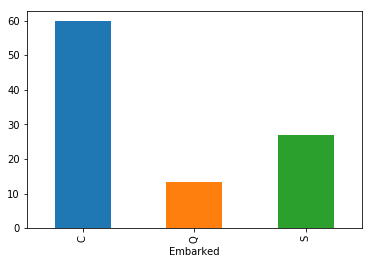

In [34]:
df.groupby('Embarked')['Fare'].mean().plot.bar()

## .map( )

.map( ) is the best of both worlds but you still have to make your data - and it only really works if you haven't got that many possibilities - great for 4 possibilities, not for 500!

In [35]:
d = {'Very Low': 0, 'Low': 1, 'Medium': 2, 'High': 3, 'Very High': 4}

In [36]:
pd.Series(test_list).map(d)

0    0
1    0
2    1
3    2
4    3
5    4
dtype: int64

#### Remember that scikit-learn tends to like floats so you might have to convert things with .astype(float)

In [37]:
df['Pclass'].astype(float).head()

0    3.0
1    1.0
2    3.0
3    1.0
4    3.0
Name: Pclass, dtype: float64

### Feature engineering

- imputation - dealing with missing values

- label encoding (sklearn needs numbers)

- binning

- scaling (handling outliers, ...)

- Interaction terms

#### All of these are collectively known as 'Cleaning Data'

## Binning

Binning transforms a scalar to a category, e.g. bins of equal width.

Let's say I'm doing exploratory data analysis and I wanna see if including age is a good idea:

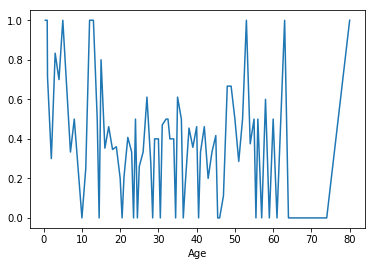

In [38]:
df.groupby('Age')['Survived'].mean().plot()

### pd. cut - Give it some data and then you give it how many bins you would like to group it into 

Ages assigned to differing intervals of fixed ranges - into bins!

Can be useful to play around with the data but can be quite difficult.

Cut takes a series of the dataframe and sorts the data into various bins (intervals) - it takes the minimum range and the maximum and splits it into intervals. **You'll have differing number of people in each bin, with bins of the same size!**

In [39]:
#here all bins are the same size
df['Age Bin'] = pd.cut(df['Age'], 20)

In [40]:
df['Age Bin']

0      (20.315, 24.294]
1       (36.231, 40.21]
2      (24.294, 28.273]
3      (32.252, 36.231]
4      (32.252, 36.231]
5                   NaN
6      (52.147, 56.126]
7         (0.34, 4.399]
8      (24.294, 28.273]
9      (12.357, 16.336]
10        (0.34, 4.399]
11     (56.126, 60.105]
12     (16.336, 20.315]
13      (36.231, 40.21]
14     (12.357, 16.336]
15     (52.147, 56.126]
16        (0.34, 4.399]
17                  NaN
18     (28.273, 32.252]
19                  NaN
20     (32.252, 36.231]
21     (32.252, 36.231]
22     (12.357, 16.336]
23     (24.294, 28.273]
24       (4.399, 8.378]
25      (36.231, 40.21]
26                  NaN
27     (16.336, 20.315]
28                  NaN
29                  NaN
             ...       
861    (20.315, 24.294]
862    (44.189, 48.168]
863                 NaN
864    (20.315, 24.294]
865     (40.21, 44.189]
866    (24.294, 28.273]
867    (28.273, 32.252]
868                 NaN
869       (0.34, 4.399]
870    (24.294, 28.273]
871    (44.189, 

In [41]:
df['Age Bin'][0]

Interval(20.315, 24.294, closed='right')

### qcut - Cut into quantiles with an equal number of data points!

Here it tries to have the same amount of people but the interval range is different!

In [42]:
df ['Age Bin QCUT'] = pd.qcut(df['Age'], 20)

In [43]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_filled,Age Bin,Age Bin QCUT
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,22.0,"(20.315, 24.294]","(20.125, 22.0]"
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,38.0,"(36.231, 40.21]","(36.0, 38.0]"
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,26.0,"(24.294, 28.273]","(25.0, 27.0]"
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,35.0,"(32.252, 36.231]","(34.0, 36.0]"
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,35.0,"(32.252, 36.231]","(34.0, 36.0]"


#### What's the point? Binning allows you to break up your data into more granular steps so you can use it! It is able to generalise your data into better intervals!


**A better example:** What if I want to use parents and children and see if having more or less of them on board will increase survival odds?

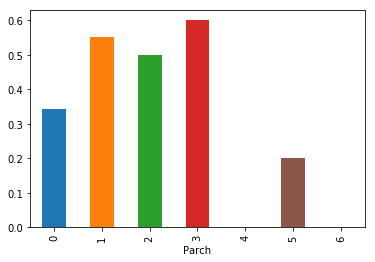

In [44]:
df.groupby('Parch')['Survived'].mean().plot.bar()

In [45]:
def is_parch_less_than_four(x):
    if x < 4:
        return 1
    else:
        return 0

In [46]:
df['parch_less_than_four'] = df['Parch'].apply(is_parch_less_than_four)

In [48]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_filled,Age Bin,Age Bin QCUT,parch_less_than_four
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,22.0,"(20.315, 24.294]","(20.125, 22.0]",1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,38.0,"(36.231, 40.21]","(36.0, 38.0]",1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,26.0,"(24.294, 28.273]","(25.0, 27.0]",1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,35.0,"(32.252, 36.231]","(34.0, 36.0]",1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,35.0,"(32.252, 36.231]","(34.0, 36.0]",1


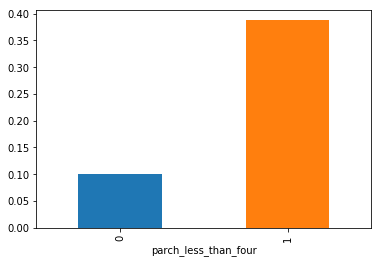

In [50]:
df.groupby('parch_less_than_four')['Survived'].mean().plot.bar()

## Normalising / Scaling

Normalizing is an overarching term for many different transformations of the data. Usually, by normalizing you want to adjust the underlying distribution of the data.

Let's say I want to normalise all my data - taking range of age from 0 to 80 to 0 to 1 (Not required for Logisic Regression this week).

### Min-Max Scaling & Standard Scaling

Scaling adjusts the range of the data or the mean and standard deviation to a defined range. Most of the time this happens, because a model expects a certain scale.

The `MinMaxScaler` scales data to between 0 and 1 (a min and a max) - **Typically used for Support Vector Machines!**

The `StandardScaler` scales to a normal distribution with mean 0 and standard deviation 1 - **Useful for clustering!**

In [58]:
df[['Age_filled']].head()

,Age_filled
0,22.0
1,38.0
2,26.0
3,35.0
4,35.0


In [56]:
# This scales between a min and a max - typically used for SVMs
from sklearn.preprocessing import MinMaxScaler

# normalise data according to mean, standard dev - useful for clustering
from sklearn.preprocessing import StandardScaler 

In [59]:
X = df[['Age_filled']] # might need 2 brackets
minmax = MinMaxScaler()
X_transformed = minmax.fit_transform(X)

In [66]:
print('Age data after MinMax Scaling: \n', X_transformed[:5])

Age data after MinMax Scaling: 
 [[0.27117366]
 [0.4722292 ]
 [0.32143755]
 [0.43453129]
 [0.43453129]]


In [65]:
X = df[['Age_filled']] 
standard = StandardScaler()
X_standardtrans = standard.fit_transform(X)
print('Age data after Standard Scaling: \n', X_standardtrans[:5])

Age data after Standard Scaling: 
 [[-0.5924806 ]
 [ 0.63878901]
 [-0.2846632 ]
 [ 0.40792596]
 [ 0.40792596]]


### Other normalization methods
- dividing by a total sum
- z-scores
- propensities – deviations from a reference value
- Box-Cox-transformation – transforming a time series to a roughly linear shape

## Interaction Terms

**Interaction terms are extra features** that result from the **product of two existing features**.

We've removed, filled, changed distribution, relabelled data into numbers, and binned data!

**NOW WE ADD TOGETHER LINEARLY** - ADD NEW COLUMNS!

In [67]:
df['Number Family Members'] = df['Parch'] + df['SibSp']

In [69]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_filled,Age Bin,Age Bin QCUT,parch_less_than_four,Number Family Members
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,22.0,"(20.315, 24.294]","(20.125, 22.0]",1,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,38.0,"(36.231, 40.21]","(36.0, 38.0]",1,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,26.0,"(24.294, 28.273]","(25.0, 27.0]",1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,35.0,"(32.252, 36.231]","(34.0, 36.0]",1,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,35.0,"(32.252, 36.231]","(34.0, 36.0]",1,0


In [73]:
from sklearn.preprocessing import PolynomialFeatures

X = pd.DataFrame({
      'a':[1.0, 2.0, 3.0],
      'b':[1.0, 2.0, 0.0]})
m = PolynomialFeatures()
m.fit_transform(X)

array([[1., 1., 1., 1., 1., 1.],
       [1., 2., 2., 4., 4., 4.],
       [1., 3., 0., 9., 0., 0.]])

### Polynomial terms
Polynomial terms ar extra features that are the square or higher powers of an existing feature.

Adding more features this way may increase the accuracy of your model. It also increases the risk of overfitting.

In [75]:
X = pd.DataFrame({'a':[1.0, 2.0, 3.0, 4.0]})
m = PolynomialFeatures(degree=3)
m.fit_transform(X)

array([[ 1.,  1.,  1.,  1.],
       [ 1.,  2.,  4.,  8.],
       [ 1.,  3.,  9., 27.],
       [ 1.,  4., 16., 64.]])

**Hint: To combine polynomial features and interaction terms, leave away the interaction_only option.**

### Feature engineering

- imputation: fill in the missing values

- label encoding (sklearn needs numbers) coverting labels into numbers

- interaction terms: creating new colums (linear combination of other columns

- binning our data

- scaling our data (handling outliers, ...)

#### All of these are collectively known as 'Cleaning Data'

### Dealing with class imbalance
In a classification task, all classes should ideally be present in equal proportions. If this is not the case, you might try to balance the data, e.g.:

- kick out some datapoints of the overrepresented classes
- draw a balanced sample of the dataset
- upsample the underrepresented classes with SMOTE

# Feature selection
If you have many features, not all might be required for an accurate model. To reduce overfitting or simply speed up your model, use feature selection

## Feature Selection Strategies
1. Remove highly correlated variables
2. Run OLS (ordinary least squares) and select significant features
3. Forward selection and backwards selection (or recursive)
4. Random Forest feature importance
5. Lasso

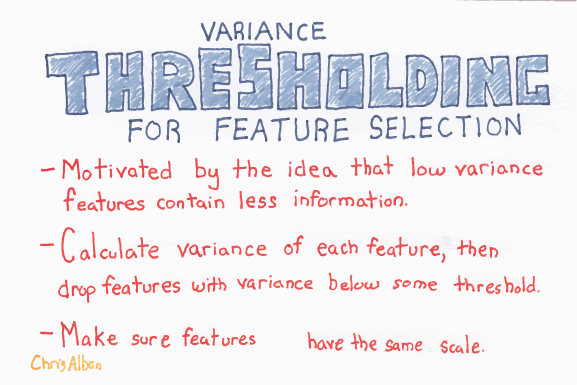